## Short demo of `psydata` functions

In [1]:
import seaborn as sns
import psyutils as pu

%load_ext autoreload
%autoreload 2

%matplotlib inline

sns.set_style("white")
sns.set_style("ticks")

I'll demo some functions here using a [dataset I simulated earlier](https://tomwallis.info/2014/05/06/simulating-data/).

In [2]:
# load data:
dat = pu.psydata.load_psy_data()
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 8 columns):
Unnamed: 0     7000 non-null int64
subject        7000 non-null object
contrast       7000 non-null float64
sf             7000 non-null float64
target_side    7000 non-null object
response       7000 non-null object
unique_id      7000 non-null object
correct        7000 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 492.2+ KB


### Bin bernoulli trials, compute binomial statistics

Compute binomial trials for each combination of contrast and sf, averaging over subjects:

In [3]:
pu.psydata.binomial_binning(dat, y='correct', 
                            grouping_variables=['contrast', 'sf'])

,contrast,sf,n_successes,n_trials,prop_corr,ci_min,ci_max,error_min,error_max
0,0.002479,0.500000,106,200,0.530,0.460792,0.598640,0.069208,0.068640
1,0.002479,1.495349,93,200,0.465,0.396452,0.534211,0.068548,0.069211
2,0.002479,4.472136,99,200,0.495,0.426002,0.564093,0.068998,0.069093
3,0.002479,13.374806,103,200,0.515,0.445840,0.583876,0.069160,0.068876
4,0.002479,40.000000,95,200,0.475,0.406274,0.544199,0.068726,0.069199
5,0.005704,0.500000,103,200,0.515,0.445840,0.583876,0.069160,0.068876
6,0.005704,1.495349,129,200,0.645,0.577555,0.709698,0.067445,0.064698
7,0.005704,4.472136,110,200,0.550,0.480825,0.618228,0.069175,0.068228
8,0.005704,13.374806,97,200,0.485,0.416124,0.554160,0.068876,0.069160
9,0.005704,40.000000,104,200,0.520,0.450817,0.588804,0.069183,0.068804


Notice that you can't compute binomial confidence intervals if the proportion success is 0 or 1. We can fix this using [Laplace's Rule of Succession](https://en.wikipedia.org/wiki/Rule_of_succession) -- add one success and one failure to each observation (basically a prior that says that both successes and failures are possible).

In [4]:
pu.psydata.binomial_binning(dat, y='correct', 
                            grouping_variables=['contrast', 'sf'],
                            rule_of_succession=True)

,contrast,sf,n_successes,n_trials,prop_corr,ci_min,ci_max,error_min,error_max
0,0.002479,0.500000,107,202,0.529703,0.460837,0.598011,0.068866,0.068308
1,0.002479,1.495349,94,202,0.465347,0.397129,0.534215,0.068218,0.068868
2,0.002479,4.472136,100,202,0.495050,0.426391,0.563801,0.068659,0.068752
3,0.002479,13.374806,104,202,0.514851,0.446034,0.583391,0.068818,0.068539
4,0.002479,40.000000,96,202,0.475248,0.406855,0.544104,0.068392,0.068856
5,0.005704,0.500000,104,202,0.514851,0.446034,0.583391,0.068818,0.068539
6,0.005704,1.495349,130,202,0.643564,0.576412,0.708023,0.067152,0.064459
7,0.005704,4.472136,111,202,0.549505,0.480671,0.617411,0.068834,0.067906
8,0.005704,13.374806,98,202,0.485149,0.416609,0.553966,0.068539,0.068818
9,0.005704,40.000000,105,202,0.519802,0.450962,0.588271,0.068840,0.068469


### Fit and plot a psychometric function to each subject, sf:

The fitted parameters are:

           sf subject  gam   lam         m         w
0    0.500000      S1  0.5  0.02 -3.039783  1.553811
1    0.500000      S2  0.5  0.02 -3.569313  1.385677
2    0.500000      S3  0.5  0.02 -3.429419  1.171425
3    0.500000      S4  0.5  0.02 -3.528454  0.333372
4    0.500000      S5  0.5  0.02 -4.265210  1.954781
5    1.495349      S1  0.5  0.02 -3.927007  0.927928
6    1.495349      S2  0.5  0.02 -5.155828  0.175250
7    1.495349      S3  0.5  0.02 -4.350894  1.168227
8    1.495349      S4  0.5  0.02 -4.474785  1.827611
9    1.495349      S5  0.5  0.02 -5.299547  1.566281
10   4.472136      S1  0.5  0.02 -3.697220  1.937106
11   4.472136      S2  0.5  0.02 -4.690916  1.049057
12   4.472136      S3  0.5  0.02 -4.092843  0.913296
13   4.472136      S4  0.5  0.02 -4.281961  0.192128
14   4.472136      S5  0.5  0.02 -4.933101  2.535801
15  13.374806      S1  0.5  0.02 -2.943758  1.837344
16  13.374806      S2  0.5  0.02 -3.775010  2.183722
17  13.374806     

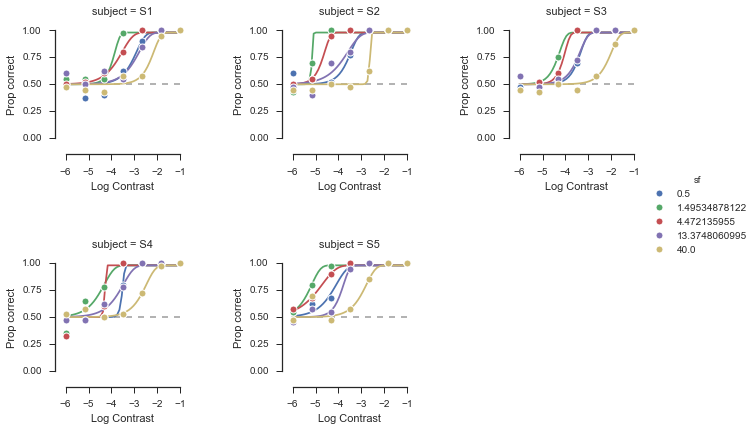

In [5]:
g = pu.psydata.plot_psy(dat, 'contrast', 'correct', 
                        function='weibull',
                        hue='sf', 
                        col='subject',
                        log_x=True,
                        col_wrap=3,
                        errors=False,                        
                        fixed={'gam': .5, 'lam':.02}, 
                        inits={'m': 0.01, 'w': 3})
g.add_legend()
g.set(xlabel='Log Contrast', ylabel='Prop correct')
g.fig.subplots_adjust(wspace=.8, hspace=.8);


Some kind of wonky fits (unrealistic slopes), but hey, that's what you get with a simple ML fit with no pooling / shrinkage / priors.

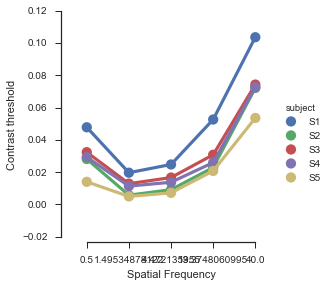

In [6]:
g = pu.psydata.plot_psy_params(dat, 'contrast', 'correct', 
                               x="sf", y="m",
                               function='weibull',
                               hue='subject', 
                               fixed={'gam': .5, 'lam':.02})
g.set(xlabel='Spatial Frequency', ylabel='Contrast threshold');

Reasonable (imposed by simulation) CSF shape recovered. 